<a href="https://colab.research.google.com/github/marco-milanesi/5bar-parallel-painting-robot/blob/main/1_IntentRecognition/Ex1_intent_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intent recognition

In [232]:
from google.colab import drive
drive.mount('/content/gdrive') # Run it if the drive hasn't already mounted

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Import packages

In [233]:
import os
import pandas as pd
import numpy as np
import statistics 
import glob
from numpy import mean, absolute

path = "/content/gdrive/MyDrive/Colab Notebooks/Social Robot/1_IntentRecognition/Kismet_data_intent/"
os.chdir(path)
extension_energy='en' #file extension of Energy features
energy_files=[i for i in glob.glob(f'*.{extension_energy}')]

extension_frequency='f0' #file extension of Frequency features
frequency_files=[i for i in glob.glob(f'*.{extension_frequency}')]

file_list=[]
# Definition of the five classes of affective communicative intents strings
substring_approval="ap" 
substring_prohibition="pw"
substring_attention="at"
# list of the class (labels)
classification=[] 
  

## Load Data for frequency

In [234]:
mean_frequency=[]
maximum_frequency=[]
range_frequency=[]
variance_frequency = []
median_frequency = []
Firstquartile_frequency = []
Thirdquartile_frequency = []
AbsoluteMeanDeviation_frequency = []
file_index_list = []
index_list = []
index = -1

for i in frequency_files:
  if substring_approval in i:
    classification.append("approval")
  elif substring_prohibition in i:
    classification.append("prohibition")
  
  if substring_approval in i or substring_prohibition in i:
    with open(i) as f:
      for line in f:
        index = index + 1
        num=float(line.split(" ")[1])
        if num != 0:
          file_list.append(num)
          file_index_list.append(index)
    
    index_list.append(file_index_list)
    file_index_list = []
    index = -1
    mean_frequency.append(np.mean(file_list))
    maximum_frequency.append(max(file_list))
    range_frequency.append(max(file_list)-min(file_list))
    variance_frequency.append(statistics.variance(file_list))
    median_frequency.append(statistics.median(file_list))
    Firstquartile_frequency.append(np.quantile(file_list,q=0.25))
    Thirdquartile_frequency.append(np.quantile(file_list,q=0.75))
    # Absolute mean deviation
    AbsoluteMeanDeviation_frequency.append(mean(absolute(file_list - mean(file_list))))
    file_list=[]

## Load Data for energy


In [235]:
from numpy.core.fromnumeric import size
mean_energy=[]
maximum_energy=[]
range_energy=[]
variance_energy = []
median_energy = []
Firstquartile_energy = []
Thirdquartile_energy = []
AbsoluteMeanDeviation_energy = []
file_index = -1
index = -1

for i in energy_files:
  if substring_approval in i or substring_prohibition in i:
    index = index + 1
    with open(i) as f:
      for line in f:
        file_index = file_index + 1
        if file_index in index_list[index]:
          num=float(line.split(" ")[1])
          file_list.append(num)

    file_index = -1
    if file_list != []:
      mean_energy.append(np.mean(file_list))
      maximum_energy.append(max(file_list))
      range_energy.append(max(file_list)-min(file_list))
      if size(file_list) > 1:
        variance_energy.append(statistics.variance(file_list))
      else:
        variance_energy.append(0)
      median_energy.append(statistics.median(file_list))
      Firstquartile_energy.append(np.quantile(file_list,q=0.25))
      Thirdquartile_energy.append(np.quantile(file_list,q=0.75))
      AbsoluteMeanDeviation_energy.append(mean(absolute(file_list - mean(file_list))))
    else:
      print(i)
      print(index_list[index])

    
    file_list=[]

# Create the dataset

In [236]:
df=pd.DataFrame()
# Labels
df=pd.DataFrame(classification,columns=['label'])
# Energy Features
df.insert(1,"mean energy",mean_energy,True)
df.insert(2,"maximum energy",maximum_energy,True)
df.insert(3,"range energy",range_energy,True)
df.insert(4,"variance energy",variance_energy,True)
df.insert(5,"median energy",median_energy,True)
df.insert(6,"First Quartile",Firstquartile_energy,True)
df.insert(7,"Third Quartile",Thirdquartile_energy,True)
df.insert(8,"Absolute Mean Deviation",AbsoluteMeanDeviation_energy,True)
# Frequency Features
df.insert(9,"mean frequency",mean_frequency,True)
df.insert(10,"maximum frequency",maximum_frequency,True)
df.insert(11,"range frequency",range_frequency,True)
df.insert(12,"variance frequency",variance_frequency,True)
df.insert(13,"median frequency",median_frequency,True)
df.insert(14,"First Quartile",Firstquartile_frequency,True)
df.insert(15,"Third Quartile",Thirdquartile_frequency,True)
df.insert(16,"Absolute Mean Deviation",AbsoluteMeanDeviation_frequency,True)
# Print the dataset created
df

,label,mean energy,maximum energy,range energy,variance energy,median energy,First Quartile,Third Quartile,Absolute Mean Deviation,mean frequency,maximum frequency,range frequency,variance frequency,median frequency,First Quartile,Third Quartile,Absolute Mean Deviation
0,prohibition,49.400000,63.0,23.0,70.416667,45.0,42.00,59.00,7.488000,237.000000,354.0,185.0,1649.750000,223.0,217.00,249.0,29.200000
1,approval,54.033333,66.0,66.0,258.929885,58.0,51.75,63.75,9.820000,280.593750,503.0,319.0,12790.378024,223.0,190.00,385.0,99.179688
2,approval,54.055556,69.0,29.0,90.921384,56.5,44.00,61.75,8.606996,291.314815,443.0,268.0,4907.465059,278.5,238.50,333.5,57.275720
3,prohibition,52.052632,72.0,72.0,207.726885,51.5,42.00,65.00,11.789474,195.000000,253.0,90.0,373.288889,189.5,181.50,204.0,14.652174
4,approval,52.969697,64.0,23.0,90.842803,54.0,42.00,63.00,8.881543,360.515152,508.0,400.0,10109.507576,355.0,298.00,441.0,82.409550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,approval,60.603774,76.0,37.0,139.705370,65.0,48.00,71.00,10.373087,220.509434,321.0,160.0,2447.370102,208.0,177.00,266.0,42.614454
364,approval,53.000000,74.0,74.0,683.636364,65.0,49.75,67.25,19.500000,255.200000,421.0,289.0,3309.348148,258.0,237.00,263.0,33.440000
365,prohibition,50.333333,74.0,74.0,236.538462,46.0,43.50,59.50,11.111111,210.022727,501.0,402.0,6610.999471,189.0,174.00,209.5,43.079545
366,approval,50.000000,69.0,69.0,312.074074,50.5,41.75,64.25,13.071429,305.179487,449.0,354.0,12049.677463,318.0,204.50,416.0,100.174885


In [237]:
labels = df.values[:,0]
samples = df.values[:,1:]

## Train test and split

In [238]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter
print("Labels distribution:",Counter(labels))

# train-test split
trainSamples, testSamples, trainLabels, testLabels = sklearn.model_selection.train_test_split(samples, labels, random_state=60,stratify=labels,train_size=0.5)
print("Train labels distribution:", Counter(trainLabels))
print("Test labels distribution:",Counter(testLabels))

Labels distribution: Counter({'prohibition': 186, 'approval': 182})
Train labels distribution: Counter({'prohibition': 93, 'approval': 91})
Test labels distribution: Counter({'prohibition': 93, 'approval': 91})


# KN Neighbors

In [239]:
model_kn = KNeighborsClassifier() # Create the model
model_kn.fit(trainSamples, trainLabels) #train the model
from sklearn.metrics import  accuracy_score,cohen_kappa_score
modelResults_kn = model_kn.predict(testSamples)

## SVM

In [240]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(trainSamples, trainLabels)
modelResults_svm = model_svm.predict(testSamples)

# Decision Tree Classifier

In [241]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(trainSamples, trainLabels)
modelResults_clf = clf.predict(testSamples)

## Gradient Boosting Classifier

In [242]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(trainSamples, trainLabels)
modelResults_gbc = gb_clf2.predict(testSamples)

## Models Evaluation

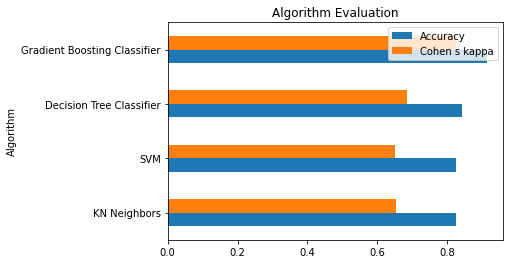

In [243]:
import matplotlib.pyplot as plt
   
data = {'Accuracy': [accuracy_score(testLabels, modelResults_kn) ,accuracy_score(testLabels, modelResults_svm) ,accuracy_score(testLabels, modelResults_clf) ,accuracy_score(testLabels, modelResults_gbc) ],
        'Cohen s kappa': [cohen_kappa_score(testLabels, modelResults_kn),cohen_kappa_score(testLabels, modelResults_svm),cohen_kappa_score(testLabels, modelResults_clf),cohen_kappa_score(testLabels, modelResults_gbc)]
       }
df = pd.DataFrame(data,columns=['Accuracy','Cohen s kappa'], index = ['KN Neighbors','SVM','Decision Tree Classifier','Gradient Boosting Classifier'])
df.plot.barh()
plt.title('Algorithm Evaluation')
plt.ylabel('Algorithm')
plt.show()

In [244]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testLabels, modelResults_gbc))
print(classification_report(testLabels, modelResults_gbc))
accuracy = accuracy_score(testLabels, modelResults_gbc) 
print("Accuracy: {:.2f}".format(accuracy))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels, modelResults_gbc)))

[[87  4]
 [12 81]]
              precision    recall  f1-score   support

    approval       0.88      0.96      0.92        91
 prohibition       0.95      0.87      0.91        93

    accuracy                           0.91       184
   macro avg       0.92      0.91      0.91       184
weighted avg       0.92      0.91      0.91       184

Accuracy: 0.91
Cohen's Kappa: 0.83


### Check functionals for both voiced (i.e. $f_0 = 0$) and unvoiced segments. Which segments are suited for the approach ?

Before removing the unvoiced segment both to the frequency and energy feature the result was the following one. The accuracy was $15 \;\%$ lower and the Cohen's Kappa $34\;\%$.

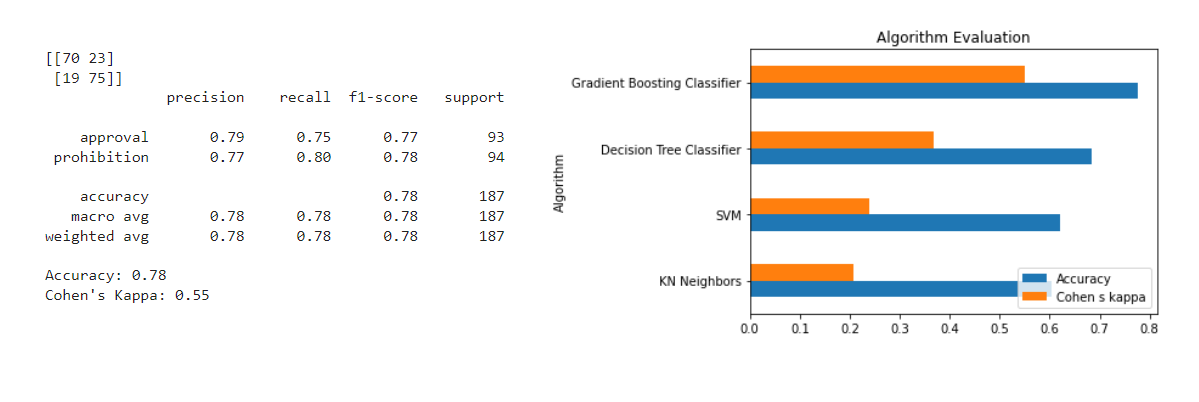
